In [ ]:
# 1. Install (if not already installed)
# pip install spatialdata spatialdata-io

# 2. Import visium_hd function correctly
from spatialdata_io.readers.visium_hd import visium_hd
import pandas as pd

# 3. Point to the directory containing feature_slice.h5, binned_outputs, segmented_outputs, spatial, etc.
data_dir = (
    "/mnt/taobo.hu/long/10X_datasets/Visium/"
    "Visium_HD/Visium_HD_Human_Lung_Cancer_post_Xenium_Prime_5K_Experiment2/"
)

# 4. Use visium_hd() to load the data
sdata_hd = visium_hd(
    path=data_dir,
    bin_size=None,                   # Load all available bin resolutions
    load_all_images=True
)

# 5. Check available tables (AnnData)
print("Available tables:", list(sdata_hd.tables.keys()))
# Typical output may look like: ['raw', 'square_008um', 'square_016um', 'segmentation_cells', ...]


In [ ]:
import numpy as np
import pandas as pd

# 1. Select a resolution, e.g., 8 μm grid (you can also use 'square_002um' or 'square_016um')
adata = sdata_hd.tables["square_008um"]

# 2. Total number of detected genes (total gene features)
total_genes = adata.n_vars
print(f"This region contains {total_genes} gene features.")

# 3. Sum raw counts for each gene across all spots/bins
#    adata.X is a sparse matrix, sum(axis=0) sums per gene (column-wise), .A1 flattens to a 1D numpy array
gene_counts = adata.X.sum(axis=0).A1

# 4. Build a DataFrame for easier viewing and further analysis
df_counts = pd.DataFrame({
    "gene":        adata.var_names,
    "raw_counts":  gene_counts
})

# 5. To check how many genes have at least one detected count:
detected_genes = np.count_nonzero(gene_counts)
print(f"Number of genes with raw counts > 0 in this region: {detected_genes}")

# 6. Sort by expression level (descending) and display Top 10 genes
df_top10 = df_counts.sort_values("raw_counts", ascending=False).head(10)
print("Top 10 most highly expressed genes:")
print(df_top10)

# 7. (Optional) Export the full table to CSV for further analysis
# df_counts.to_csv("square_008um_gene_counts.csv", index=False)


In [ ]:
# 1. Install required packages (if not already installed)
# pip install spatialdata spatialdata-io

# 2. Import Xenium reader and pandas
from spatialdata_io.readers.xenium import xenium
import pandas as pd

# 3. Specify Xenium output directory
data_dir = (
    "/mnt/taobo.hu/long/10X_datasets/Xenium/"
    "Xenium_5K/Xenium_Prime_Human_Lung_Cancer_FFPE_outs"
)

# 4. Load the entire dataset with xenium()
#    This will automatically load `cell_feature_matrix.h5`, `transcripts.parquet`, `cells.parquet`, etc.
sdata = xenium(
    path=data_dir,
    cells_boundaries=False,  # Set to True if you want to load cell boundary data
    n_jobs=64                # Number of parallel threads, adjust based on your machine
)

# 5. List all available AnnData matrices
print("Available tables:", list(sdata.tables.keys()))
# Usually there will be a key called "table", corresponding to the cell × gene counts matrix

# 6. Extract the original gene × cell matrix
adata = sdata.tables["table"]

# 7. Total number of detected genes
total_genes = adata.n_vars
print(f"Total number of detected genes: {total_genes}")

# 8. Sum raw counts for each gene across all cells
#    .X is a sparse matrix, sum(axis=0) sums per gene (column-wise), .A1 flattens to a 1D numpy array
gene_counts = adata.X.sum(axis=0).A1

# 9. Build a DataFrame and sort by counts (descending)
df = pd.DataFrame({
    "gene":       adata.var_names,
    "raw_counts": gene_counts
}).sort_values("raw_counts", ascending=False)

# 10. Number of genes with raw counts > 0
detected_genes = (gene_counts > 0).sum()
print(f"Number of genes with raw counts > 0: {detected_genes}")

# 11. Print the top 10 most highly expressed genes
print("Top 10 most highly expressed genes:")
print(df.head(10))

# 12. (Optional) Save to file
# df.to_csv("xenium_FFPE_gene_counts.csv", index=False)


INFO     reading                                                                                                   
         /mnt/taobo.hu/long/10X_datasets/Xenium/Xenium_5K/Xenium_Prime_Human_Lung_Cancer_FFPE_outs/cell_feature_mat
         rix.h5                                                                                                    


/tmp/ipykernel_2555206/3696781793.py:16: DeprecationWarning: The default value of `cells_as_circles` will change to `False` in the next release. Please pass `True` explicitly to maintain the current behavior.
  sdata = xenium(


INFO     Transposing `data` of type: <class 'dask.array.core.Array'> to ('c', 'y', 'x').                           
Available tables: ['table']
共检测到 5001 个基因。
其中 raw counts > 0 的基因有 5001 个。
Top10 高表达基因：
         gene  raw_counts
1306    EEF1G   1942422.0
884   CLPTM1L    630450.0
210     ANXA2    522384.0
3619     RAC1    515716.0
3228    PDIA4    493490.0
2500   LPCAT1    473322.0
1387    EPAS1    461997.0
4906    YWHAZ    445709.0
3317      PKM    409527.0
2442     LDHA    408371.0


In [ ]:
import numpy as np
import pandas as pd

# 1. Extract spatial coordinates
#    Typically obsm["spatial"] is an (n_cells, 2) array: first column is x, second is y
coords = adata.obsm["spatial"]
x = coords[:, 0]
y = coords[:, 1]

# 2. Create mask: x ≤ 5194.8 and y ≥ 1974.3
mask = (x <= 5194.8) & (y >= 1974.3)

# 3. Subset AnnData based on mask
adata_region = adata[mask, :].copy()

# 4. Verify: how many cells/spots are in the selected region
print(f"Number of spots/cells in the selected region: {adata_region.n_obs}")

# —— If you also want to compute raw counts per gene in this region ——
gene_counts = adata_region.X.sum(axis=0).A1
df = pd.DataFrame({
    "gene":       adata_region.var_names,
    "raw_counts": gene_counts
}).sort_values("raw_counts", ascending=False)

print("Top 10 most highly expressed genes:")
print(df.head(10))


选区内共有 137570 个 spot/cell
Top10 高表达基因：
         gene  raw_counts
1306    EEF1G   1217731.0
884   CLPTM1L    393505.0
3228    PDIA4    331705.0
3619     RAC1    307569.0
2500   LPCAT1    295901.0
210     ANXA2    287220.0
4906    YWHAZ    269072.0
2442     LDHA    267991.0
3317      PKM    257720.0
1389    EPCAM    227577.0


/home/taobo.hu/miniconda3/envs/py311/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


/home/taobo.hu/miniconda3/envs/py311/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


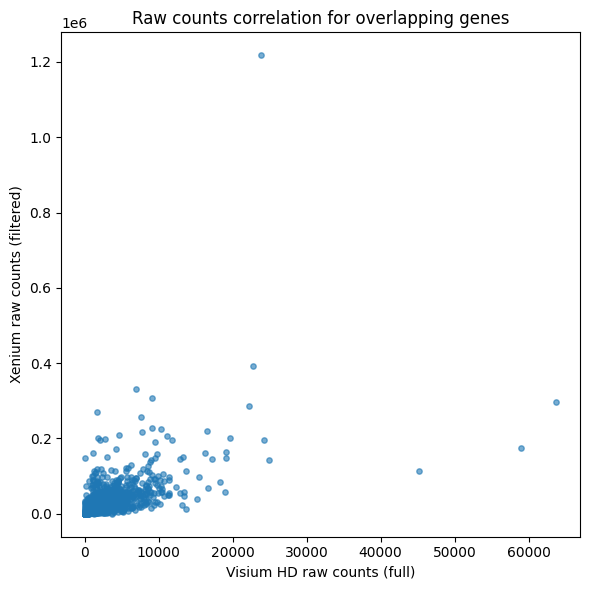

In [ ]:
# 1. Import required packages (assuming already installed)
from spatialdata_io.readers.visium_hd import visium_hd
from spatialdata_io.readers.xenium    import xenium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Load full Visium HD data (no filtering)
vis_adata = sdata_hd.tables['square_008um']  # or use any of 'square_016um', 'square_002um'

# 3. Compute total raw counts per gene in Visium HD
vis_counts = vis_adata.X.sum(axis=0).A1
vis_df = pd.DataFrame({
    'gene':           vis_adata.var_names,
    'vis_raw_counts': vis_counts
})

# 4. Load Xenium Prime data
xen_adata = sdata.tables['table']

# 5. Apply spatial filter to Xenium data: x ≤ 5194.8 and y ≥ 1974.3
coords = xen_adata.obsm['spatial']    # shape (n_spots, 2): [x, y]
mask   = (coords[:,0] <= 5194.8) & (coords[:,1] >= 1974.3)
xen_region = xen_adata[mask, :].copy()

# 6. Compute total raw counts per gene in the filtered Xenium region
xen_counts = xen_region.X.sum(axis=0).A1
xen_df = pd.DataFrame({
    'gene':            xen_region.var_names,
    'xen_raw_counts':  xen_counts
})

# 7. Merge the two tables, keeping only overlapping genes
merged = pd.merge(vis_df, xen_df, on='gene')

# 8. Plot scatter: Visium vs Xenium
plt.figure(figsize=(6,6))
plt.scatter(
    merged['vis_raw_counts'],
    merged['xen_raw_counts'],
    alpha=0.6, s=15
)
plt.xlabel('Visium HD raw counts (full)')
plt.ylabel('Xenium raw counts (filtered)')
plt.title('Raw counts correlation for overlapping genes')
plt.tight_layout()
plt.show()


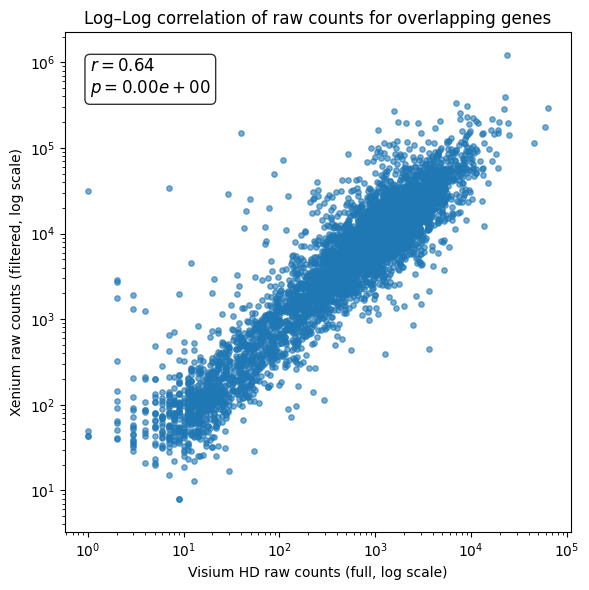

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 2. Configure PDF output to use Type42 (TrueType) fonts to ensure text is editable
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype']  = 42

# Assume 'merged' is the previously merged DataFrame
x = merged['vis_raw_counts']
y = merged['xen_raw_counts']

# 1. Compute Pearson correlation coefficient and p-value
r, p = pearsonr(x, y)

# 2. Plot scatter plot
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(x, y, alpha=0.6, s=15)

# 3. Set log scale for both axes (keep this if log scale is desired)
ax.set_xscale('log')
ax.set_yscale('log')

# 4. Add r and p to the plot
#    Use transform=ax.transAxes to position text relative to axes
text = f"$r = {r:.2f}$\n$p = {p:.2e}$"
ax.text(
    0.05, 0.95, text,
    transform=ax.transAxes,
    va='top', ha='left',
    fontsize=12,
    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8)
)

# 5. Axis labels and title
ax.set_xlabel('Visium HD raw counts (full, log scale)')
ax.set_ylabel('Xenium raw counts (filtered, log scale)')
ax.set_title('Log–Log correlation of raw counts for overlapping genes')

# 6. Save as PDF (optional)
plt.tight_layout()
plt.savefig('raw_counts_correlation_with_rp.pdf', format='pdf', dpi=300)

plt.show()


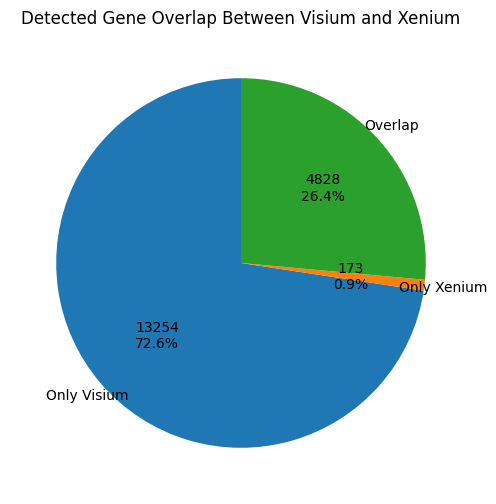

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# 1. Prepare data
genes_vis = set(vis_df['gene'])
genes_xen = set(xen_df['gene'])
only_vis = genes_vis - genes_xen
only_xen = genes_xen - genes_vis
both     = genes_vis & genes_xen
sizes    = [len(only_vis), len(only_xen), len(both)]
labels   = ['Only Visium', 'Only Xenium', 'Overlap']

# 2. Configure PDF output to use Type42 (TrueType) fonts to ensure text is editable
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype']  = 42

# 3. Define custom autopct function to show "count\npercent%"
def make_autopct(sizes):
    total = sum(sizes)
    def autopct(pct):
        count = int(round(pct * total / 100.0))
        return f"{count}\n{pct:.1f}%"
    return autopct

# 4. Plot pie chart
fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct=make_autopct(sizes),
    textprops={'va':'center', 'ha':'center'},
    startangle=90
)

ax.set_title('Detected Gene Overlap Between Visium and Xenium')

# 5. Save as PDF with vector text
plt.savefig('gene_overlap_pie.pdf',
            format='pdf',
            bbox_inches='tight',
            dpi=300)

plt.show()


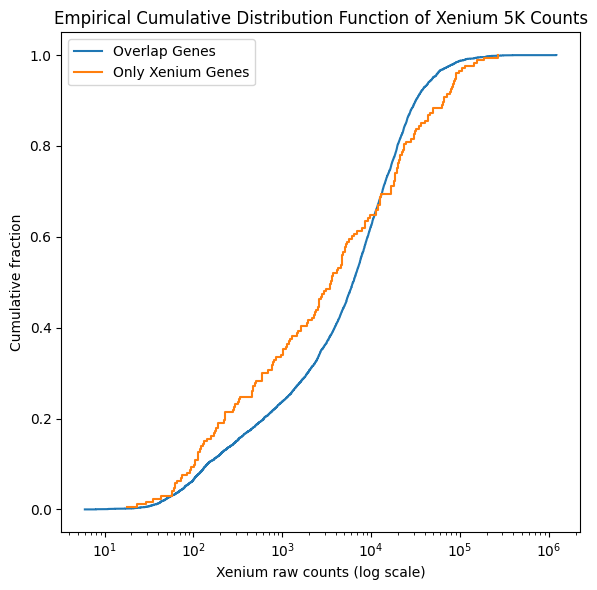

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2. Configure PDF output to use Type42 (TrueType) fonts to ensure text is editable
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype']  = 42

# 1. Construct gene sets
genes_vis = set(vis_df['gene'])
genes_xen = set(xen_df['gene'])

# 2. Compute "Only Xenium" and "Overlap" gene lists
only_xen = genes_xen - genes_vis
overlap  = genes_xen & genes_vis

# 3. Extract corresponding counts from xen_df
xen_only_counts    = xen_df.loc[xen_df['gene'].isin(only_xen),   'xen_raw_counts'].values
xen_overlap_counts = xen_df.loc[xen_df['gene'].isin(overlap),    'xen_raw_counts'].values

# 4. Define ECDF function
def ecdf(arr):
    x = np.sort(arr)
    y = np.arange(1, len(x)+1) / len(x)
    return x, y

# 5. Compute ECDF
x1, y1 = ecdf(xen_overlap_counts)
x2, y2 = ecdf(xen_only_counts)

# 6. Plot ECDF
plt.figure(figsize=(6,6))
plt.step(x1, y1, where='post', label='Overlap Genes')
plt.step(x2, y2, where='post', label='Only Xenium Genes')
plt.xscale('log')
plt.xlabel('Xenium raw counts (log scale)')
plt.ylabel('Cumulative fraction')
plt.title('Empirical Cumulative Distribution Function of Xenium 5K Counts')
plt.legend()
plt.tight_layout()

# 7. Save as PDF with vector text
plt.savefig('ECDF.pdf',
            format='pdf',
            bbox_inches='tight',
            dpi=300)

plt.show()


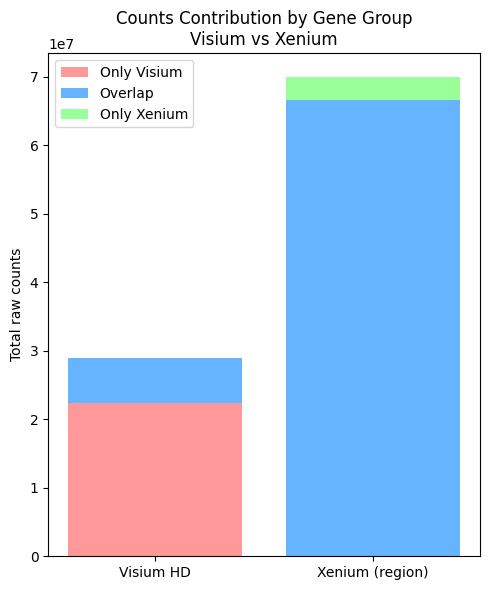

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2. Configure PDF output to use Type42 (TrueType) fonts to ensure text is editable
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype']  = 42

# 1. Compute three gene sets
genes_vis = set(vis_df['gene'])
genes_xen = set(xen_df['gene'])
only_vis  = genes_vis - genes_xen
only_xen  = genes_xen - genes_vis
overlap   = genes_vis & genes_xen

# 2. Compute total counts for each gene group on each platform
sum_vis_only_vis  = vis_df.loc[vis_df['gene'].isin(only_vis),   'vis_raw_counts'].sum()
sum_vis_overlap   = vis_df.loc[vis_df['gene'].isin(overlap),    'vis_raw_counts'].sum()
sum_vis_only_xen  = vis_df.loc[vis_df['gene'].isin(only_xen),   'vis_raw_counts'].sum()

sum_xen_only_vis  = xen_df.loc[xen_df['gene'].isin(only_vis),   'xen_raw_counts'].sum()
sum_xen_overlap   = xen_df.loc[xen_df['gene'].isin(overlap),    'xen_raw_counts'].sum()
sum_xen_only_xen  = xen_df.loc[xen_df['gene'].isin(only_xen),   'xen_raw_counts'].sum()

# 3. Prepare data for stacked bar plot
platforms = ['Visium HD', 'Xenium (region)']
only_vis_vals  = [sum_vis_only_vis,  sum_xen_only_vis]
overlap_vals   = [sum_vis_overlap,   sum_xen_overlap]
only_xen_vals  = [sum_vis_only_xen,  sum_xen_only_xen]

# 4. Define colors
colors = {
    'Only Visium': '#FF9999',
    'Overlap'    : '#66B3FF',
    'Only Xenium': '#99FF99'
}

# 5. Plot stacked bar chart
fig, ax = plt.subplots(figsize=(5, 6))

# First layer: Only Visium
ax.bar(platforms, only_vis_vals, 
       color=colors['Only Visium'], label='Only Visium')

# Second layer: Overlap (stacked on top of first layer)
ax.bar(platforms, overlap_vals, 
       bottom=only_vis_vals,
       color=colors['Overlap'], label='Overlap')

# Third layer: Only Xenium (stacked on top of first two layers)
bottom_vals = np.array(only_vis_vals) + np.array(overlap_vals)
ax.bar(platforms, only_xen_vals, 
       bottom=bottom_vals,
       color=colors['Only Xenium'], label='Only Xenium')

# 6. Styling
ax.set_ylabel('Total raw counts')
ax.set_title('Counts Contribution by Gene Group\nVisium vs Xenium')
ax.legend(loc='upper left')

plt.tight_layout()

# 7. Save as PDF with vector text
plt.savefig('boxplot.pdf',
            format='pdf',
            bbox_inches='tight',
            dpi=300)

plt.show()
